In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('features.csv')

## EDA

In [3]:
df.head()

,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Sex,Age,Species,Call
0,Acinonyx_jubatus_S0612_02,2,706,1,0.083313,0.015951,848.0,263.00,-3.270038,1526.165771,0.101744,18.307605,0.734437,0.117970,NaN,A,A. jubatus,growl
1,Acinonyx_jubatus_S0612_02,21,3456,4,0.296424,0.035485,3645.5,452.25,-2.419156,1377.502653,0.625990,18.523777,0.682254,0.112089,NaN,A,A. jubatus,NaN
2,Acinonyx_jubatus_S0612_02,8,2984,5,0.171860,0.022913,2181.8,308.00,-2.863807,1011.861165,0.214492,18.676903,0.664394,0.211802,NaN,A,A. jubatus,growl
3,Acinonyx_jubatus_S0612_02,11,3108,5,0.243933,0.023587,3437.0,314.00,-3.096756,1207.803345,0.279397,18.298732,0.731459,0.147876,NaN,A,A. jubatus,NaN
4,Acinonyx_jubatus_S0612_02,5,1919,3,0.194653,0.029304,2189.0,331.00,-2.780607,942.326097,0.370894,18.787422,0.632496,0.193519,NaN,A,A. jubatus,growl


In [4]:
df.shape

(606, 18)

In [5]:
df.columns.values

array(['File Name', 'Partials', 'Zero_Crossings', 'Duration', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'MFCC',
       'Spectral Rolloff', 'Melspectrogram', 'Spectral Contrast',
       'Chromagram', 'Tempogram', 'Sex', 'Age', 'Species', 'Call'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   File Name          606 non-null    object 
 1   Partials           606 non-null    int64  
 2   Zero_Crossings     606 non-null    int64  
 3   Duration           606 non-null    int64  
 4   Amp_range          606 non-null    float64
 5   Avg_amp            606 non-null    float64
 6   Freq_range         606 non-null    float64
 7   Pulses_per_Sec     606 non-null    float64
 8   MFCC               606 non-null    float64
 9   Spectral Rolloff   606 non-null    float64
 10  Melspectrogram     606 non-null    float64
 11  Spectral Contrast  606 non-null    float64
 12  Chromagram         606 non-null    float64
 13  Tempogram          606 non-null    float64
 14  Sex                405 non-null    object 
 15  Age                437 non-null    object 
 16  Species            606 non

In [7]:
df.describe(include='all')

,File Name,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Sex,Age,Species,Call
count,606,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,405,437,606,593
unique,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,18,37
top,Leopardus_Pardalis_SoundsFiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl
freq,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,276,113,220
mean,NaN,13.262376,10375.399340,5.693069,0.243260,0.024690,4952.482170,670.145633,-5.801938,3754.562957,0.791486,18.499721,0.705104,0.165910,NaN,NaN,NaN,NaN
std,NaN,26.573002,16082.698274,7.754808,0.245438,0.028946,3276.910697,649.646743,3.084488,1960.387799,2.889716,1.421796,0.088868,0.058358,NaN,NaN,NaN,NaN
min,NaN,0.000000,281.000000,1.000000,0.003207,0.000551,1.000000,0.000000,-14.324327,472.488169,0.000100,12.954071,0.196460,0.009798,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2482.250000,2.000000,0.065170,0.005972,2359.500000,251.725000,-8.660103,2032.147528,0.015124,17.594131,0.652052,0.126073,NaN,NaN,NaN,NaN
50%,NaN,5.000000,4754.000000,3.000000,0.168142,0.016122,4133.083333,439.500000,-5.794813,3760.177145,0.132644,18.341881,0.716829,0.161689,NaN,NaN,NaN,NaN
75%,NaN,14.000000,11442.750000,6.000000,0.319435,0.033408,7638.187500,835.291667,-3.069494,5253.195317,0.580200,19.259454,0.771592,0.214996,NaN,NaN,NaN,NaN


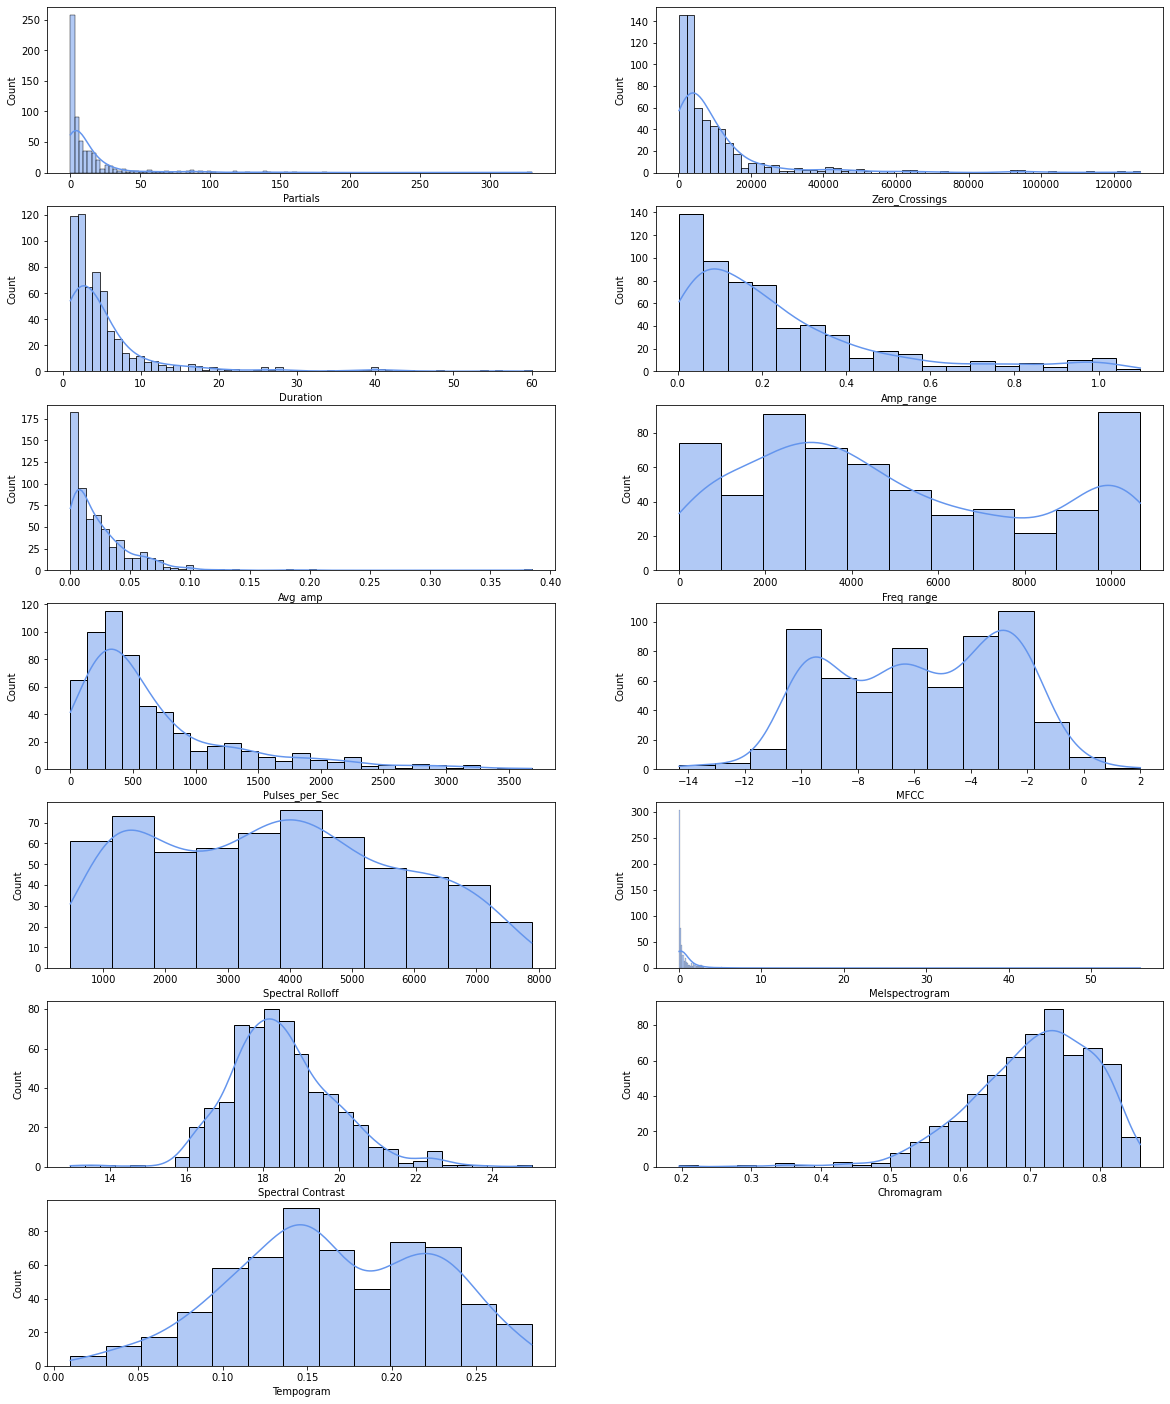

In [8]:
#Histogram to check distribution and skewness
l= ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram','Tempogram']

plt.figure(figsize=(20,25))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.histplot(df[l[i]],kde=True,color='cornflowerblue') 
plt.show()

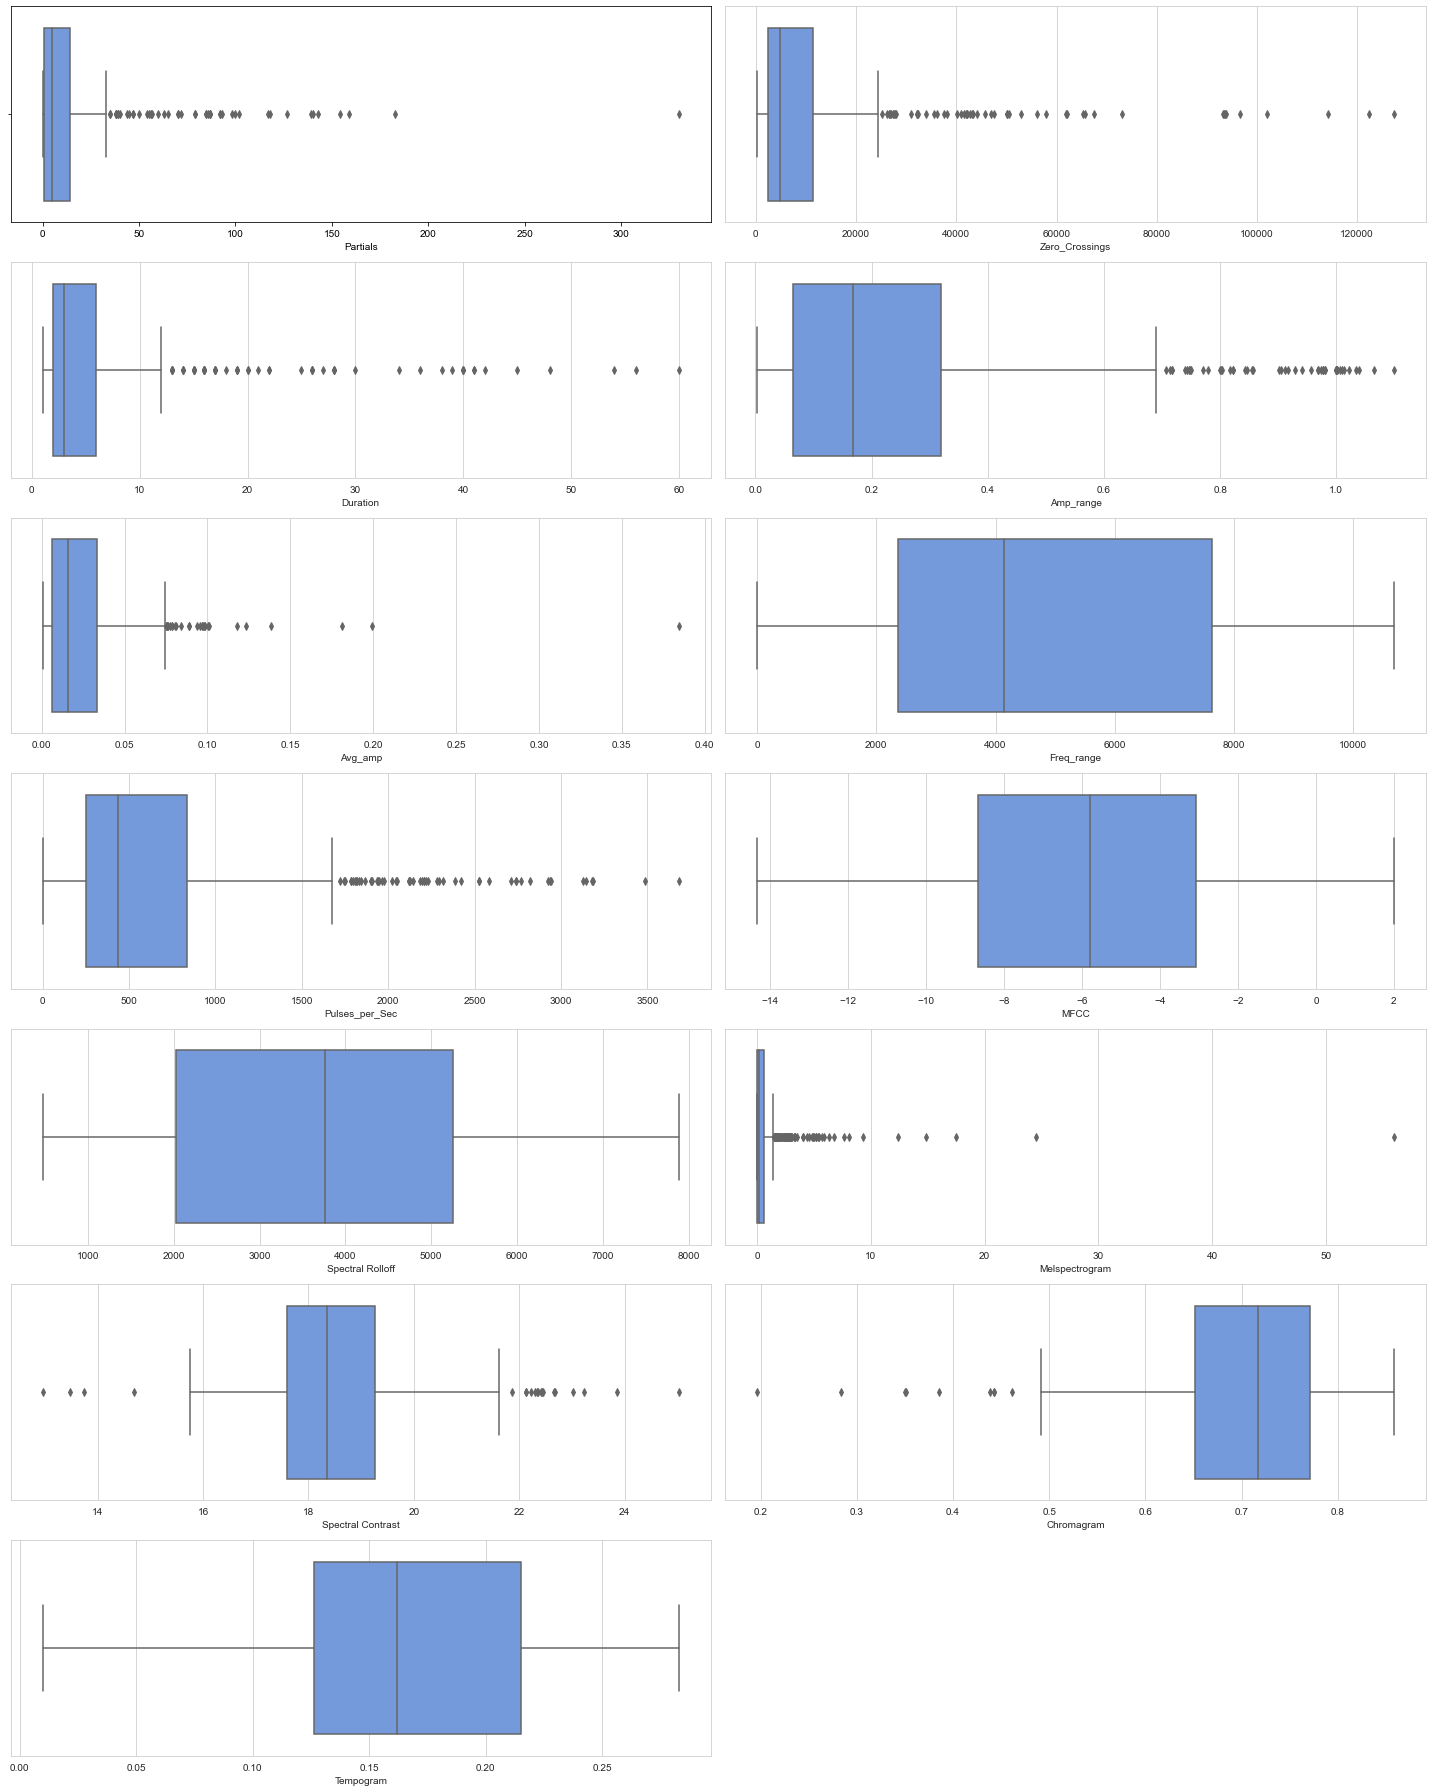

In [9]:
#Boxplot to check for outliers
l= ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram','Tempogram']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(7,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='cornflowerblue',orient='h')
    plt.tight_layout()
plt.show()    

<AxesSubplot:>

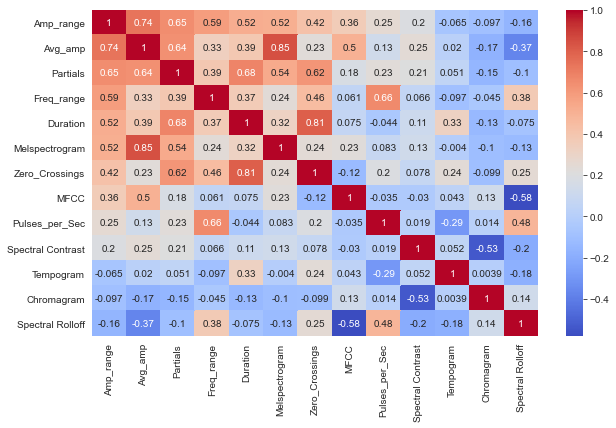

In [10]:
#Quality correlation matrix
k = 13 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

Pre-cleaned Data Values

In [11]:
df['Call'].value_counts()

growl                          220
hiss                            54
main call                       46
Prusten                         44
roaring sequence                29
Roaring sequence                23
call                            21
growl?                          21
call?                           18
single call?                    14
Roaring sequence                11
Hiss                            10
Growl                            8
purr                             7
mew?                             7
unknown                          6
puff                             5
roar                             5
growl/hiss                       4
call/growl                       4
roar?                            4
call sequence                    4
purr sequence                    4
Growl                            3
hiss                             3
Mew                              3
call sequence?                   2
mew                              2
grow/hiss           

In [12]:
df['Species'].value_counts()

Ocelot              113
L. lynx              81
L. serval            64
Domestic Cat         58
A. jubatus           53
Wildcat              47
Leopard              41
Caracal Carcal       30
Clouded leopard      29
Lion                 27
jaguar               11
Jaguar               11
Bobcat               10
C. temminckii         7
Lion                  7
Snow Leopard          7
Clouded Leopard       6
Leopard               4
Name: Species, dtype: int64

## Data Cleansing

In [13]:
df['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'Growl', 'Hiss',
       'Loud rumble/roar', 'Sharp Hiss', 'call', 'unknown', 'growl/hiss',
       'call sequence', 'purr', 'purr sequence', 'main call',
       'call/growl', 'Call sequence(possible mew)', 'mew', 'hiss ',
       'call sequence?', 'single call?', 'call?', 'mew?', 'grow/hiss',
       'Prusten', 'Roaring sequence ', 'Roaring sequence',
       'roaring sequence', 'puff', 'Mew', 'roar', 'roar or call',
       'growl ', 'roar?', 'Growl ', 'Roaring seqeunce',
       'Roaring Sequence'], dtype=object)

In [14]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss','Prusten':'prusten','Roaring sequence ': 'roar','Roaring sequence':'roar', 'roaring sequence':'roar', 'Growl ':'growl',
       'Roaring seqeunce':'roar', 'Roaring Sequence':'roar'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['growl', nan, 'hiss', 'roar', 'call', 'growl/hiss', 'purr',
       'call/growl', 'mew', 'prusten', 'puff', 'Mew'], dtype=object)

In [15]:
df['Age'].unique()

array(['A', 'Adult', nan, 'Adult ', 'Juvenile ', 'juvenile', 'Juvenile',
       'young ', 'young', 'adult', 'A ', 'adult '], dtype=object)

In [16]:
clean2 = {'A':'Adult','A ':'Adult','Adult ':'Adult','adult':'Juvenile', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile',
          'young':'Juvenile','young ':'Juvenile', 'adult ':'Adult'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Adult', 'Unknown', 'Juvenile'], dtype=object)

In [17]:
df['Sex'].unique()

array([nan, 'G (1 M and 2F)', 'P', 'F', 'Male', 'Pair (Unknown)',
       'Female ', 'male ', 'M', 'Unknown', 'Female', 'female ', 'female',
       'male', 'G'], dtype=object)

In [18]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 
          'G (1 M and 2F)':'Group', 'female':'Female','female ':'Female','male':'Male'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [19]:
df.Species.unique()

array(['A. jubatus', 'Caracal Carcal', 'Domestic Cat', 'Ocelot',
       'C. temminckii', 'Wildcat', 'L. serval', 'Clouded Leopard ',
       'Clouded leopard', 'Jaguar ', 'jaguar', 'Leopard', 'Leopard ',
       'Snow Leopard ', 'L. lynx', 'Bobcat', 'Lion', 'Lion '],
      dtype=object)

In [20]:
clean4 = {'jaguar': 'Jaguar','Jaguar ':'Jaguar','Leopard ':'Leopard', 'Clouded Leopard ':'Clouded leopard','Lion ':'Lion',
          'Snow Leopard ':'Snow leopard'}

df.replace(clean4, inplace= True)
df.Species.unique()

array(['A. jubatus', 'Caracal Carcal', 'Domestic Cat', 'Ocelot',
       'C. temminckii', 'Wildcat', 'L. serval', 'Clouded leopard',
       'Jaguar', 'Leopard', 'Snow leopard', 'L. lynx', 'Bobcat', 'Lion'],
      dtype=object)

In [21]:
df.describe(include='object')

,File Name,Sex,Age,Species,Call
count,606,606,606,606,587
unique,111,5,3,14,11
top,Leopardus_Pardalis_SoundsFiles,Male,Adult,Ocelot,growl
freq,113,239,393,113,253


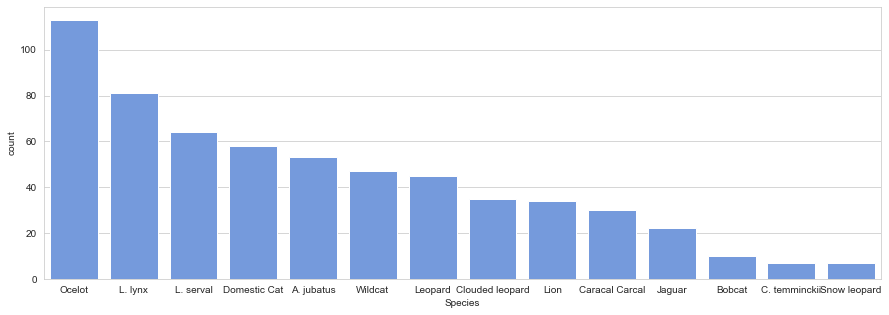

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='Species', data=df,order = df['Species'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

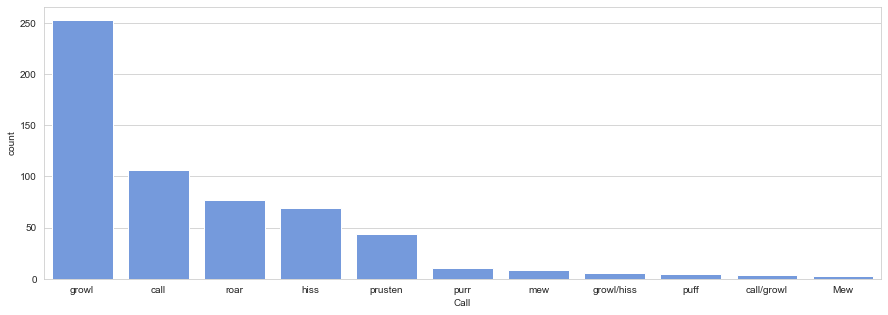

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x='Call', data=df, order = df['Call'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

## Standardize Continuous Features

In [24]:
continuous = ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram', 'Tempogram']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))


In [25]:
df.describe(include='float64')

,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02
mean,5.928518e-16,-7.035077e-17,-2.198461e-16,-1.516938e-16,-8.024384e-17,1.593427e-16,7.630493e-17,-9.141935e-17,1.306253e-16,-6.705307e-17,-8.622549e-16,4.079062e-16,-2.148996e-16
std,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00
min,-4.995044e-01,-6.281743e-01,-6.056818e-01,-9.788703e-01,-8.346163e-01,-1.512270e+00,-1.032406e+00,-2.765266e+00,-1.675580e+00,-2.740893e-01,-3.903678e+00,-5.728320e+00,-2.677252e+00
25%,-4.618412e-01,-4.911906e-01,-4.766231e-01,-7.262015e-01,-6.471603e-01,-7.919423e-01,-6.446062e-01,-9.273912e-01,-8.793354e-01,-2.688859e-01,-6.374606e-01,-5.974671e-01,-6.831830e-01
50%,-3.111881e-01,-3.498196e-01,-3.475643e-01,-3.063105e-01,-2.962446e-01,-2.502588e-01,-3.553257e-01,2.311873e-03,2.866181e-03,-2.281837e-01,-1.111064e-01,1.320428e-01,-7.238812e-02
75%,2.778132e-02,6.642122e-02,3.961210e-02,3.106176e-01,3.014497e-01,8.202616e-01,2.544190e-01,8.865981e-01,7.650886e-01,-7.317707e-02,5.347889e-01,7.487765e-01,8.418126e-01
max,1.192937e+01,7.276403e+00,7.008787e+00,3.488946e+00,1.243855e+01,1.749604e+00,4.642283e+00,2.530087e+00,2.109091e+00,1.911150e+01,4.596504e+00,1.725078e+00,2.005211e+00


In [28]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)